In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
using Plots

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
nucleations = [(time=0., site=Point3(0., 0., -d / 2)), (time=0., site=Point3(0., 0., d / 2))]
η_max = 15.
ηs = LinRange(0.5, η_max, 30) |> collect
snapshot = BubblesSnapShot(nucleations, η_max)

BubblesSnapShot(@NamedTuple{time::Float64, site::Point3}[(time = 0.0, site = Point3([0.0, 0.0, -1.2])), (time = 0.0, site = Point3([0.0, 0.0, 1.2]))], 15.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 100)
k_vecs = (x -> Vec3(0., 0., x)).(ks)

100-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.39269908169872414]
 [0.0, 0.0, 0.5890486225480862]
 [0.0, 0.0, 0.7853981633974483]
 [0.0, 0.0, 0.9817477042468105]
 [0.0, 0.0, 1.1780972450961724]
 [0.0, 0.0, 1.3744467859455345]
 [0.0, 0.0, 1.5707963267948966]
 [0.0, 0.0, 1.7671458676442588]
 [0.0, 0.0, 1.9634954084936207]
 ⋮
 [0.0, 0.0, 18.064157758141313]
 [0.0, 0.0, 18.260507298990674]
 [0.0, 0.0, 18.456856839840036]
 [0.0, 0.0, 18.653206380689397]
 [0.0, 0.0, 18.84955592153876]
 [0.0, 0.0, 19.04590546238812]
 [0.0, 0.0, 19.242255003237485]
 [0.0, 0.0, 19.438604544086846]
 [0.0, 0.0, 19.634954084936208]

In [4]:
k_0

1.9634954084936207

In [5]:
ks

100-element LinRange{Float64, Int64}:
 0.19635, 0.392699, 0.589049, 0.785398, …, 19.0459, 19.2423, 19.4386, 19.635

# numerical computation

In [6]:
import EnvelopeApproximation.GravitationalPotentials: ψ as _ψ
ψ = _ψ(k_vecs, snapshot, ηs, 10, 10; rtol=1e-2)

30×100 Matrix{ComplexF64}:
       0.0+0.0im          …           0.0+0.0im
   9.54612-3.36874e-15im     -1.56364e-16+5.80508e-17im
   63.1108-1.67073e-14im          0.14602+1.40893e-16im
   231.511-5.02305e-14im         0.556774-1.09329e-15im
   630.436-1.18484e-13im         0.802551-7.09639e-15im
    1429.0-2.34547e-13im  …       1.54651+3.40868e-10im
   2859.63-4.07312e-13im          2.00129+1.36351e-9im
   5219.51-6.35535e-13im          1.84928+2.72702e-9im
   8869.53-9.09067e-13im           1.6304+4.09049e-9im
   14238.8-1.21881e-12im          0.89286+5.56812e-9im
          ⋮               ⋱  
 4.31033e5+3.33741e-12im         -3.84968+2.73954e-8im
 5.13494e5+6.4599e-12im           -3.0989+2.79515e-8im
 6.05098e5+1.04965e-11im         -3.54437+2.9031e-8im
  705713.0+1.55869e-11im       -0.0384661+2.97376e-8im
 8.15038e5+2.19056e-11im  …     -0.758277+2.91766e-8im
 9.32588e5+2.96029e-11im          2.70568+2.79821e-8im
 1.05765e6+3.88266e-11im          2.80753+2.68508e-8im
  1.1893e6+

In [9]:
p = plot(ηs, ψ[end, :] .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)

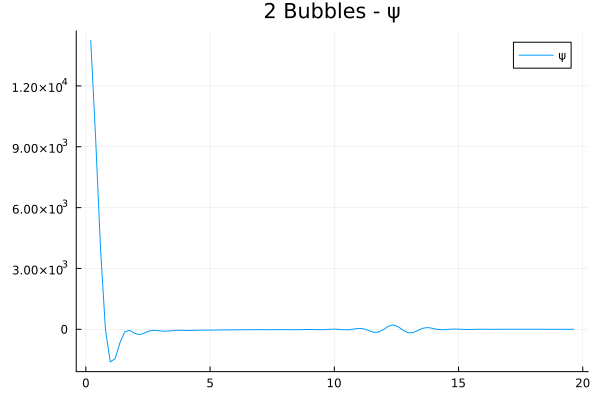

In [10]:
p = plot(norm.(ks), ψ[10, :] .|> real, label="ψ", title="2 Bubbles - ψ")
display(p)

In [11]:
i0 = 5

for i in i0:5:30

end

# Saving the data

In [13]:
using JLD2
data = Dict("ks" => k_vecs, "ηs" => ηs, "ψ" => ψ)

jldsave("gravitational_potential_varying_k_varying_eta.json"; ψ_data = data)